In [1]:
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt

In [2]:
#load the ct file
x = loadmat('ct.mat')

In [3]:
#check the ct file type
type(x)

dict

In [4]:
#print the keys to check where the ct is stored
x.keys()


dict_keys(['__header__', '__version__', '__globals__', 'ct'])

In [5]:
#select variable 'ct' and convert it from dictionary to numpy array
ct = np.array(x['ct'])

In [6]:
#convert ct indexes into attenuation indexes
#attenuation coefficient of water in mm^-1
uH2O=0.0206
#attenuation coefficients
#from the handout:
#ct = (u-uH20)*1000/uH2O
#so, isolating u
#ct*uH2O/1000 + uH2O = u
#and now factoring uH2O 
u = uH2O * (1+ct/1000)

In [7]:
print(ct[0])

[[ 23.295837   20.746489    2.4918919 ...  52.116295   34.131428
   40.819077 ]
 [  3.8592334  -2.2240756 -15.509193  ...  45.182007   30.368427
   51.74978  ]
 [-16.260353  -34.212234  -41.103077  ...  43.32169    39.403618
   68.23341  ]
 ...
 [ 16.024765   30.050323   29.375303  ...  75.94692    72.104195
   67.40582  ]
 [  7.7605343  12.286239   -1.5905908 ...  71.261475   59.30492
   53.449272 ]
 [  4.9095564  -5.872124  -25.832262  ...  58.510315   44.194675
   44.866108 ]]


In [8]:
print(u[0])

[[0.0210799  0.02102738 0.02065133 ... 0.0216736  0.02130311 0.02144087]
 [0.0206795  0.02055418 0.02028051 ... 0.02153075 0.02122559 0.02166605]
 [0.02026504 0.01989523 0.01975328 ... 0.02149243 0.02141172 0.02200561]
 ...
 [0.02093011 0.02121904 0.02120513 ... 0.02216451 0.02208535 0.02198856]
 [0.02075987 0.0208531  0.02056723 ... 0.02206799 0.02182168 0.02170105]
 [0.02070114 0.02047903 0.02006786 ... 0.02180531 0.02151041 0.02152424]]


In [9]:
#prints the size
[rows, cols, slices] = ct.shape
print(rows, cols, slices)

512 512 256


In [10]:
#selecting slices
ax_slice = u[:,:,slices//2]
sag_slice = u[:, cols//2, :]
cor_slice = u[rows//2, :, :]

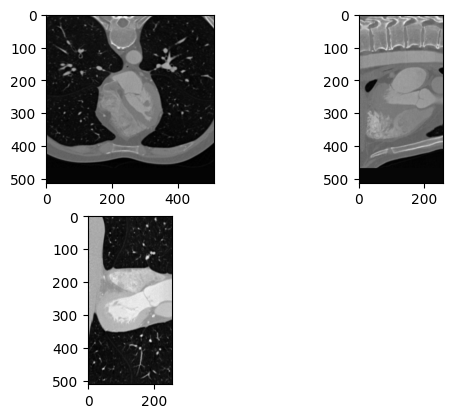

In [11]:
#checking if it looks okay
plt.figure("Mid Orthogonal Slices")
plt.subplot(2, 2, 1)
plt.imshow(ax_slice, cmap="gray")
plt.subplot(2, 2, 2)
plt.imshow(sag_slice, cmap="gray")
plt.subplot(2, 2, 3)
plt.imshow(cor_slice, cmap="gray")

In [12]:
#seems okay, just need to flip some and readjust the image display scale to a better range
#The axial slice needs to be flipped 180deg bc the sternum has to be on top
#The sagital slice needs to be flipped 90deg bc the sternum has to be on the right (na maior parte das imagens que vi que
#o esterno estava à esquerda mas na aula a prof aponta o nariz para a direita)
#The sagital slice needs to be flipped 90deg bc the largest part of the heart (viewed from a coronal plane is o the bottom)
#Axial Slice
ax_slice=np.flipud(ax_slice)
#Sagital Slice
sag_slice=np.rot90(sag_slice)
#Coronal Slice
cor_slice=np.rot90(cor_slice)

In [2]:
import math
print(math.sqrt(262144))

512.0


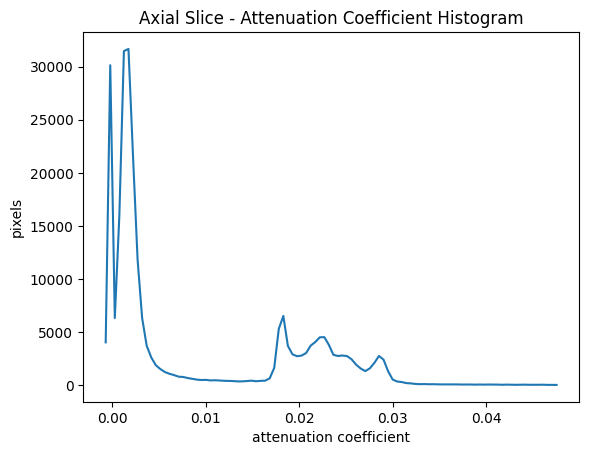

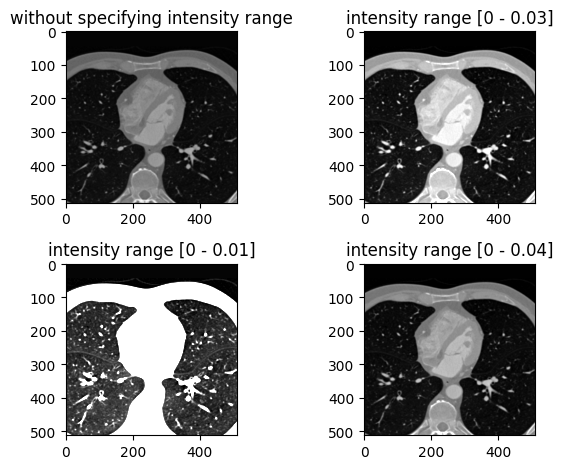

In [13]:
#Axial Slice
# create the histogram
histogram, bin_edges = np.histogram(ax_slice, bins=100) #nrm de bins ideal?
#coloquei este nrm de bins aleatorios mas a imagem tem 262144 pixeis e é 512*512
# configure and draw the histogram figure
plt.figure()
plt.title("Axial Slice - Attenuation Coefficient Histogram")
plt.xlabel("attenuation coefficient")
plt.ylabel("pixels")
plt.plot(bin_edges[0:-1], histogram)

# let's try again setting the attenuation coefficient ranges to [0 - 0.04]
plt.figure('Axial Slice - readjusting scale')
plt.subplot(2, 2, 1)
plt.imshow(ax_slice, cmap='gray')
plt.title('without specifying intensity range')
plt.subplot(2, 2, 2)
plt.imshow(ax_slice, cmap='gray', vmin=0, vmax=0.03)
plt.title('intensity range [0 - 0.03]')
plt.subplot(2, 2, 3)
plt.imshow(ax_slice, cmap='gray', vmin=0, vmax=0.01)
plt.title('intensity range [0 - 0.01]')
plt.subplot(2, 2, 4)
plt.imshow(ax_slice, cmap='gray', vmin=0, vmax=0.04) #melhor?
plt.title('intensity range [0 - 0.04]')
plt.tight_layout()

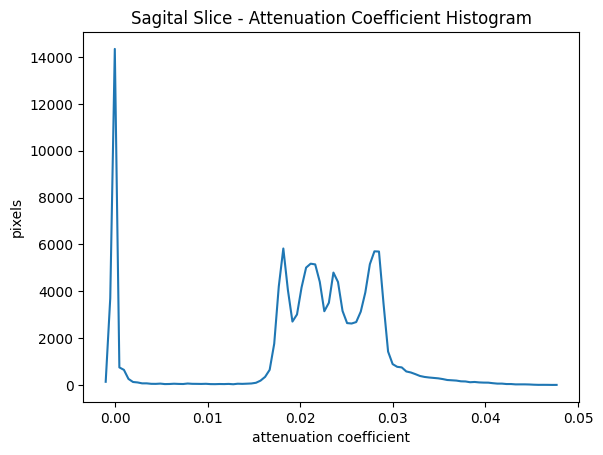

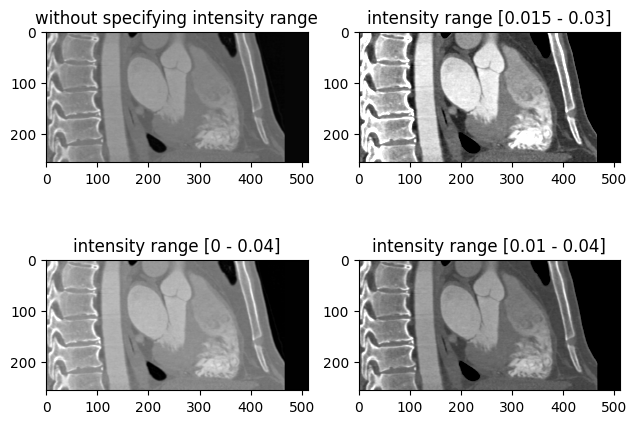

In [14]:
#Sagital Slice
#create the histogram
histogram, bin_edges = np.histogram(sag_slice, bins=100)
#coloquei este nrm de bins aleatorios 
# configure and draw the histogram figure
plt.figure()
plt.title("Sagital Slice - Attenuation Coefficient Histogram")
plt.xlabel("attenuation coefficient")
plt.ylabel("pixels")
plt.plot(bin_edges[0:-1], histogram)

# let's try again setting the attenuation coefficient ranges to [0 - 0.04]
plt.figure('Sagital Slice - readjusting scale')
plt.subplot(2, 2, 1)
plt.imshow(sag_slice, cmap='gray')
plt.title('without specifying intensity range')
plt.subplot(2, 2, 2)
plt.imshow(sag_slice, cmap='gray', vmin=0.015, vmax=0.03)
plt.title('intensity range [0.015 - 0.03]')
plt.subplot(2, 2, 3)
plt.imshow(sag_slice, cmap='gray', vmin=0, vmax=0.04)
plt.title('intensity range [0 - 0.04]')
plt.subplot(2, 2, 4)
plt.imshow(sag_slice, cmap='gray', vmin=0.01, vmax=0.04) #melhor
plt.title('intensity range [0.01 - 0.04]')
plt.tight_layout()

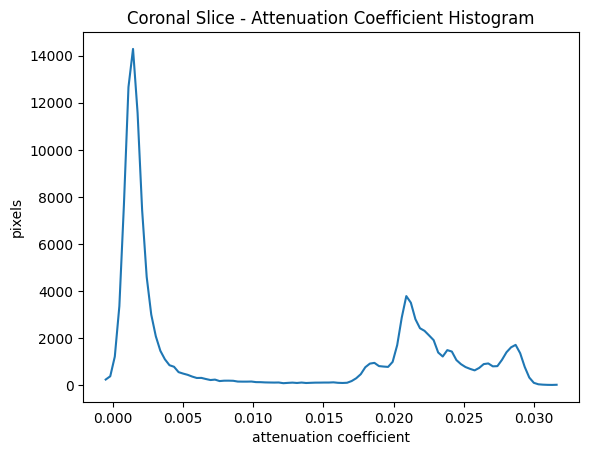

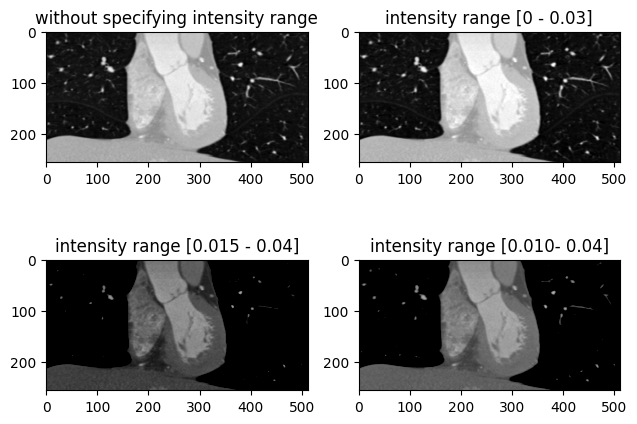

In [15]:
#Coronal Slice
#create the histogram
histogram, bin_edges = np.histogram(cor_slice, bins=100)
#coloquei este nrm de bins aleatorios 
# configure and draw the histogram figure
plt.figure()
plt.title("Coronal Slice - Attenuation Coefficient Histogram")
plt.xlabel("attenuation coefficient")
plt.ylabel("pixels")
plt.plot(bin_edges[0:-1], histogram)

# let's try again setting the attenuation coefficient ranges to [0 - 0.03]
plt.figure('Coronal Slice - readjusting scale')
plt.subplot(2, 2, 1)
plt.imshow(cor_slice, cmap='gray')
plt.title('without specifying intensity range')
plt.subplot(2, 2, 2)
plt.imshow(cor_slice, cmap='gray', vmin=0, vmax=0.03)
plt.title('intensity range [0 - 0.03]')
plt.subplot(2, 2, 3)
plt.imshow(cor_slice, cmap='gray', vmin=0.015, vmax=0.04) 
plt.title('intensity range [0.015 - 0.04]')
plt.subplot(2, 2, 4)
plt.imshow(cor_slice, cmap='gray', vmin=0.010, vmax=0.04) #melhor?
plt.title('intensity range [0.010- 0.04]')
plt.tight_layout()

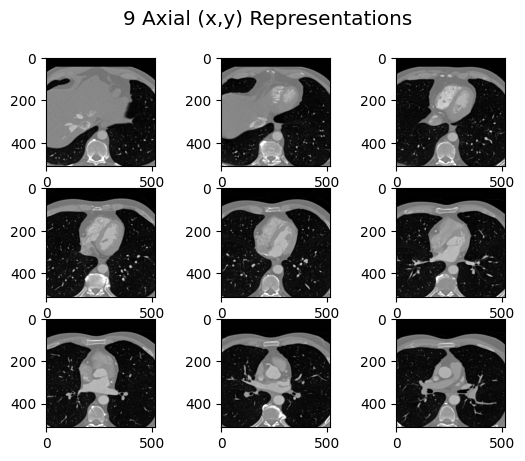

In [16]:
#Finally, let's show the representation 
#Axial
jump_ax=slices//9
fig = plt.figure()
st = fig.suptitle("9 Axial (x,y) Representations", fontsize="x-large")
for i in range(9):
    sl= jump_ax*i
    ax_sl = np.flipud(u[:,:,sl])
    plt.subplot(3,3,i+1)
    plt.imshow(ax_sl, cmap='gray', vmin=0, vmax=0.04)
    
#com tight layout a imagem 9 nao plotta fdp
    

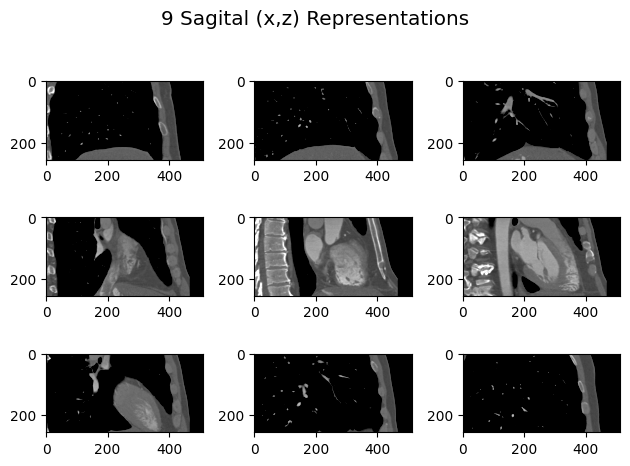

In [17]:
#Sagital
jump_sag=cols//9
fig = plt.figure()
st = fig.suptitle("9 Sagital (x,z) Representations", fontsize="x-large")
for i in range(9):
    col= jump_sag*i
    sag_col = np.rot90(u[:,col,:])
    plt.subplot(3,3,i+1)
    plt.imshow(sag_col, cmap='gray', vmin=0.01, vmax=0.04)
    plt.tight_layout()
    

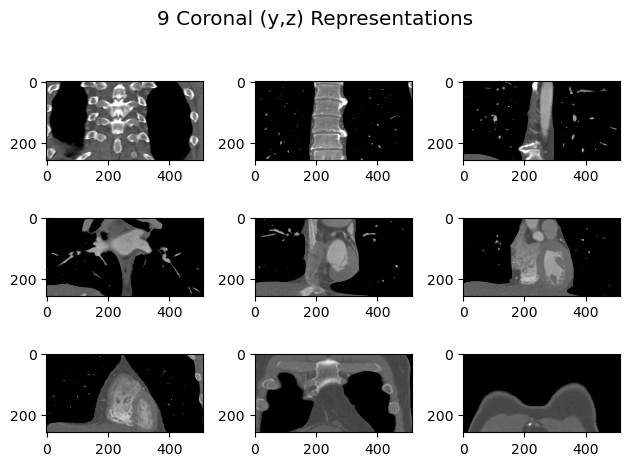

In [22]:
#Coronal
jump_cor=rows//9
fig = plt.figure()
st = fig.suptitle("9 Coronal (y,z) Representations", fontsize="x-large")
for i in range(9):
    row= jump_cor*i
    cor_row = np.rot90(u[row,:,:])
    plt.subplot(3,3,i+1)
    plt.imshow(cor_row, cmap='gray', vmin=0.01, vmax=0.04)
    plt.tight_layout()